In [1]:
import copy

import cvrplib
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd

from alns import ALNS, State
from alns.accept import RecordToRecordTravel
from alns.select import RouletteWheel
from alns.stop import MaxRuntime

In [2]:
%matplotlib inline

In [3]:
SEED = 1234

In [4]:
# data, bks = cvrplib.read('data/ORTEC-n242-k12.vrp', 'data/ORTEC-n242-k12.sol')
data = cvrplib.read('data/C101.txt')

print(data.name)
print(data.dimension)
print(data.capacity)
print(data.demands)
# print(type(data.distances))
print(data.service_times)

C101
101
200
[0, 10, 30, 10, 10, 10, 20, 20, 20, 10, 10, 10, 20, 30, 10, 40, 40, 20, 20, 10, 10, 20, 20, 10, 10, 40, 10, 10, 20, 10, 10, 20, 30, 40, 20, 10, 10, 20, 30, 20, 10, 10, 20, 10, 10, 10, 30, 10, 10, 10, 10, 10, 10, 20, 40, 10, 30, 40, 30, 10, 20, 10, 20, 50, 10, 10, 10, 10, 10, 10, 30, 20, 10, 10, 50, 20, 10, 10, 20, 10, 10, 30, 20, 10, 20, 30, 10, 20, 30, 10, 10, 10, 20, 40, 10, 30, 10, 30, 20, 10, 20]
[0, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90]


In [5]:
import alns_state.state as st

In [6]:
initial_state = st.nearest_neighbor(data)
initial_state.routes

[[21, 22, 23, 26, 28, 30, 27, 25, 24, 29, 20, 43, 42],
 [67, 65, 63, 62, 74, 72, 61, 64, 68, 69, 66],
 [5, 3, 4, 6, 8, 9, 11, 10, 7, 1, 2, 75, 91, 89],
 [47, 49, 52, 50, 51, 48, 45, 44, 40, 41, 46, 59, 57, 55],
 [90, 87, 86, 84, 85, 88, 83, 82, 81, 78],
 [98, 96, 95, 94, 93, 92, 97, 100, 99],
 [13, 17, 18, 19, 15, 14, 16, 12],
 [34, 36, 39, 38, 37, 35, 31, 33, 32],
 [54, 53, 56, 58, 60, 80, 79, 77, 73],
 [76, 71, 70]]

In [7]:
from alns_operator import removal as rm
# import operator.removal as rm

In [8]:
# curr = rm.random_removal(initial_state, rnd.RandomState(SEED))
# print(curr.cost)

In [9]:
removal = rm.Removal(5, 2)

In [10]:
curr = removal.remove_specific_customer(initial_state, 29)
print(curr.cost)

1040


In [11]:
# sorted_cost = removal.sort_desc_cost_request(initial_state)
# print(sorted_cost)

In [12]:
curr = removal.worst_removal(initial_state, rnd.RandomState(SEED))
print(curr.cost)
print(curr.routes)

1036
[[21, 22, 23, 26, 28, 30, 27, 25, 24, 29, 20, 43, 42], [67, 65, 63, 62, 74, 72, 61, 64, 68, 69], [5, 3, 4, 6, 8, 9, 11, 10, 7, 1, 2, 75, 89], [47, 49, 52, 50, 51, 48, 45, 44, 40, 41, 46, 59, 57], [90, 87, 86, 84, 85, 88, 83, 82, 81, 78], [98, 96, 95, 94, 92, 97, 100, 99], [13, 17, 18, 19, 15, 14, 16, 12], [34, 36, 39, 38, 37, 35, 31, 33, 32], [54, 53, 56, 58, 60, 80, 79, 77, 73], [76, 71]]


In [13]:
from alns_operator import repairation as rp 

insertion = rp.Repairation()

In [14]:
alns = ALNS(rnd.RandomState(SEED))

# alns.add_destroy_operator(removal.random_removal)
alns.add_destroy_operator(removal.worst_removal)

alns.add_repair_operator(insertion.greedy_repair)

In [15]:
from alns_operator import initial as initial

init = initial.nearest_neighbor(data)
select = RouletteWheel([25, 5, 1, 0], 0.8, 1, 1)
accept = RecordToRecordTravel.autofit(init.objective(), 0.02, 0, 9000)
stop = MaxRuntime(10)

result = alns.iterate(init, select, accept, stop)

In [16]:
print(f'initial cost: {init.objective()}')

initial cost: 1050


In [17]:
solution = result.best_state
objective = solution.objective()
# pct_diff = 100 * (objective - bks.cost) / bks.cost

print(f"Best heuristic objective is {objective}.")
# print(f"This is {pct_diff:.1f}% worse than the optimal solution, which is {bks.cost}.")

Best heuristic objective is 928.


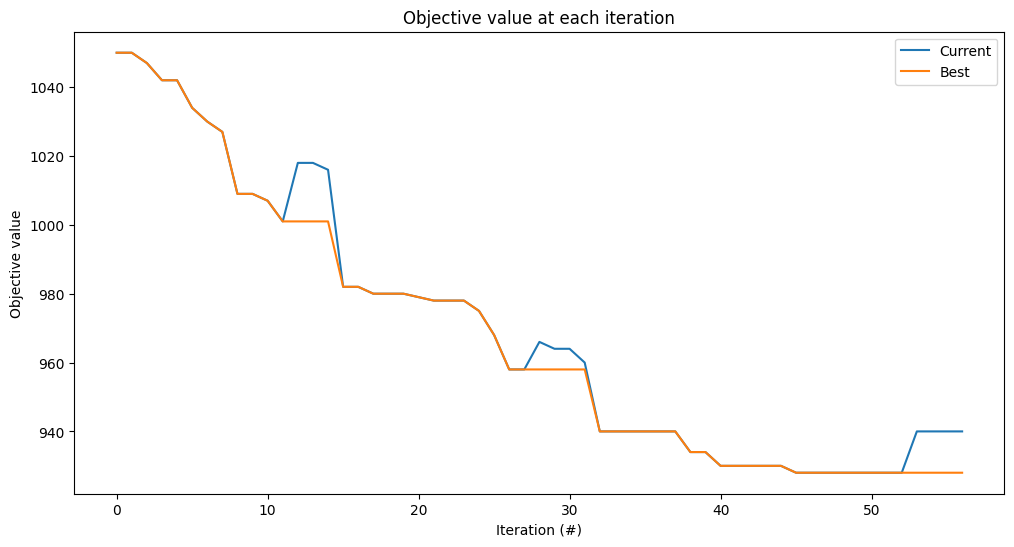

In [18]:
_, ax = plt.subplots(figsize=(12, 6))
result.plot_objectives(ax=ax)